# EDA: Weather

EDA on weather dataset + correlations with WNV positive tests.

[EDA: Basic](./EDA: Basic.ipynb)

[EDA: Graphs](./EDA: Graphs.ipynb)

[EDA: Maps](./EDA: Map.ipynb)

[EDA: Weather](./EDA: Weather.ipynb)

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('assets/train.csv')
test = pd.read_csv('assets/test.csv')
weather = pd.read_csv('assets/weather.csv')

In [3]:
train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [4]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [5]:
weather.drop(['CodeSum'], axis=1)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,1849,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,-,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,1850,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,-,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,1851,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,...,-,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,1852,0,M,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,-,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,1853,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,...,-,M,M,M,T,29.46,30.09,11.2,7,11.5


In [6]:
weather.isnull().sum().sort_values(ascending=False)

AvgSpeed       0
ResultDir      0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
Station        0
dtype: int64

In [8]:
weatherdate = weather['Date']
#weatherdate.iloc[0::2, :]

In [9]:
weatherdate.shape

(2944,)

In [10]:
weatherdate = weatherdate.iloc[::2]
weatherdate.shape

(1472,)

In [12]:
cols = ['Date']
weather[cols] = weather[cols].apply(pd.to_datetime, errors='coerce', axis=0)

In [13]:
cols = ['WetBulb', 'SeaLevel', 'Tavg', 'AvgSpeed', 'Heat', 'Cool', 'AvgSpeed', 'PrecipTotal', 'Water1']
weather[cols] = weather[cols].apply(pd.to_numeric, errors='coerce', axis=0)
#pd.to_numeric(weather['Tavg', 'Heat', 'Cool', 'AvgSpeed', 'PrecipTotal', 'Water1'])

In [14]:
weather.head(2)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67.0,14,51,56.0,0.0,2.0,...,,0,NaN,0.0,0.0,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,M,51,57.0,0.0,3.0,...,,M,NaN,M,0.0,29.18,29.82,2.7,25,9.6


In [15]:
weather = weather.drop(['CodeSum', 'Station', 'Water1', 'SnowFall', 'Sunrise', 'Sunset', 'Depart', 'Date', 'Depth', 'StnPressure' ], axis=1)

In [16]:
weather.dtypes

Tmax             int64
Tmin             int64
Tavg           float64
DewPoint         int64
WetBulb        float64
Heat           float64
Cool           float64
PrecipTotal    float64
SeaLevel       float64
ResultSpeed    float64
ResultDir        int64
AvgSpeed       float64
dtype: object

In [17]:
weather.head(10)

,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,83,50,67.0,51,56.0,0.0,2.0,0.0,29.82,1.7,27,9.2
1,84,52,68.0,51,57.0,0.0,3.0,0.0,29.82,2.7,25,9.6
2,59,42,51.0,42,47.0,14.0,0.0,0.0,30.09,13.0,4,13.4
3,60,43,52.0,42,47.0,13.0,0.0,0.0,30.08,13.3,2,13.4
4,66,46,56.0,40,48.0,9.0,0.0,0.0,30.12,11.7,7,11.9
5,67,48,58.0,40,50.0,7.0,0.0,0.0,30.12,12.9,6,13.2
6,66,49,58.0,41,50.0,7.0,0.0,NaN,30.05,10.4,8,10.8
7,78,51,NaN,42,50.0,NaN,NaN,0.0,30.04,10.1,7,10.4
8,66,53,60.0,38,49.0,5.0,0.0,NaN,30.10,11.7,7,12.0
9,66,54,60.0,39,50.0,5.0,0.0,NaN,30.09,11.2,7,11.5


In [22]:
weatherdate;

In [24]:
weather1 = pd.DataFrame(weather.values.reshape(-1,2,weather.shape[1]).mean(1))
weather1.shape

(1472, 12)

In [25]:
weather1.isnull().sum()

0       0
1       0
2      11
3       0
4       4
5      11
6      11
7     256
8       9
9       0
10      0
11      3
dtype: int64

In [26]:
weather1.set_index(keys=weatherdate).head()

,0,1,2,3,4,5,6,7,8,9,10,11
Date,,,,,,,,,,,,
2007-05-01,83.5,51.0,67.5,51.0,56.5,0.0,2.5,0.0,29.820,2.20,26.0,9.40
2007-05-02,59.5,42.5,51.5,42.0,47.0,13.5,0.0,0.0,30.085,13.15,3.0,13.40
2007-05-03,66.5,47.0,57.0,40.0,49.0,8.0,0.0,0.0,30.120,12.30,6.5,12.55
2007-05-04,72.0,50.0,NaN,41.5,50.0,NaN,NaN,NaN,30.045,10.25,7.5,10.60
2007-05-05,66.0,53.5,60.0,38.5,49.5,5.0,0.0,NaN,30.095,11.45,7.0,11.75


In [27]:
weather1.columns = ['Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'PrecipTotal', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed']

In [28]:
weather1.head()

,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,83.5,51.0,67.5,51.0,56.5,0.0,2.5,0.0,29.820,2.20,26.0,9.40
1,59.5,42.5,51.5,42.0,47.0,13.5,0.0,0.0,30.085,13.15,3.0,13.40
2,66.5,47.0,57.0,40.0,49.0,8.0,0.0,0.0,30.120,12.30,6.5,12.55
3,72.0,50.0,NaN,41.5,50.0,NaN,NaN,NaN,30.045,10.25,7.5,10.60
4,66.0,53.5,60.0,38.5,49.5,5.0,0.0,NaN,30.095,11.45,7.0,11.75


In [29]:
weather1 = weather1.set_index(keys=weatherdate)

In [30]:
weatherdate.shape
weather1.head()

,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,
2007-05-01,83.5,51.0,67.5,51.0,56.5,0.0,2.5,0.0,29.820,2.20,26.0,9.40
2007-05-02,59.5,42.5,51.5,42.0,47.0,13.5,0.0,0.0,30.085,13.15,3.0,13.40
2007-05-03,66.5,47.0,57.0,40.0,49.0,8.0,0.0,0.0,30.120,12.30,6.5,12.55
2007-05-04,72.0,50.0,NaN,41.5,50.0,NaN,NaN,NaN,30.045,10.25,7.5,10.60
2007-05-05,66.0,53.5,60.0,38.5,49.5,5.0,0.0,NaN,30.095,11.45,7.0,11.75


In [32]:
weather1.shape

(1472, 12)

In [25]:
#weather = pd.merge(weather,
 #                train[['WnvPresent']],
  #                 how='right')
#weather1['Wnv']=train['WnvPresent']

In [33]:
weather1.isnull().sum().sort_values(ascending=False)

PrecipTotal    256
Cool            11
Heat            11
Tavg            11
SeaLevel         9
WetBulb          4
AvgSpeed         3
ResultDir        0
ResultSpeed      0
DewPoint         0
Tmin             0
Tmax             0
dtype: int64

In [34]:
weather2=weather1.fillna(weather1.mean(axis=0, numeric_only = ['PrecipTotal', 'Cool', 'Heat', 'Tavg', 'SeaLevel', 'WetBulb', 'AvgSpeed']))
weather2.shape

(1472, 12)

In [35]:
weather2.isnull().sum().sort_values(ascending=False)

AvgSpeed       0
ResultDir      0
ResultSpeed    0
SeaLevel       0
PrecipTotal    0
Cool           0
Heat           0
WetBulb        0
DewPoint       0
Tavg           0
Tmin           0
Tmax           0
dtype: int64

In [36]:
weather2

,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,
2007-05-01,83.5,51.0,67.500000,51.0,56.5,0.000000,2.500000,0.000000,29.820,2.20,26.0,9.40
2007-05-02,59.5,42.5,51.500000,42.0,47.0,13.500000,0.000000,0.000000,30.085,13.15,3.0,13.40
2007-05-03,66.5,47.0,57.000000,40.0,49.0,8.000000,0.000000,0.000000,30.120,12.30,6.5,12.55
2007-05-04,72.0,50.0,67.256674,41.5,50.0,3.396304,5.652977,0.155169,30.045,10.25,7.5,10.60
2007-05-05,66.0,53.5,60.000000,38.5,49.5,5.000000,0.000000,0.155169,30.095,11.45,7.0,11.75
2007-05-06,68.0,50.5,59.500000,30.0,46.0,5.500000,0.000000,0.000000,30.285,14.10,10.5,14.75
2007-05-07,83.5,48.5,66.000000,40.0,53.5,0.000000,1.000000,0.155169,30.120,8.55,17.5,10.20
2007-05-08,81.0,57.0,69.000000,57.5,62.5,0.000000,4.000000,0.155169,30.025,2.60,9.5,5.60
2007-05-09,76.5,62.0,69.500000,59.5,63.0,0.000000,4.500000,0.075000,29.935,3.90,8.0,6.05


In [37]:
features = ['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent']

train = train[features].copy(deep=True)

In [38]:
X=pd.merge(train, weather2, how='left', left_on='Date', right_index=True)

In [40]:
X.isnull().sum().sort_values(ascending=False)

AvgSpeed                  0
ResultDir                 0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
Tmax                      0
Tmin                      0
Tavg                      0
DewPoint                  0
WetBulb                   0
Heat                      0
Cool                      0
PrecipTotal               0
SeaLevel                  0
ResultSpeed               0
Date                      0
dtype: int64

In [41]:
X

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,75.5,58.5,65.5,0.0,10.5,0.000,30.100,5.80,17.0,6.95
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,75.5,58.5,65.5,0.0,10.5,0.000,30.100,5.80,17.0,6.95
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,75.5,58.5,65.5,0.0,10.5,0.000,30.100,5.80,17.0,6.95
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,75.5,58.5,65.5,0.0,10.5,0.000,30.100,5.80,17.0,6.95
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,75.5,58.5,65.5,0.0,10.5,0.000,30.100,5.80,17.0,6.95
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,...,75.5,58.5,65.5,0.0,10.5,0.000,30.100,5.80,17.0,6.95
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,...,75.5,58.5,65.5,0.0,10.5,0.000,30.100,5.80,17.0,6.95
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,...,75.5,58.5,65.5,0.0,10.5,0.000,30.100,5.80,17.0,6.95
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,...,75.5,58.5,65.5,0.0,10.5,0.000,30.100,5.80,17.0,6.95
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,...,75.5,58.5,65.5,0.0,10.5,0.000,30.100,5.80,17.0,6.95


In [42]:
X.shape

(10506, 24)

Text(0.5,1,'Weather and WNV correlation')

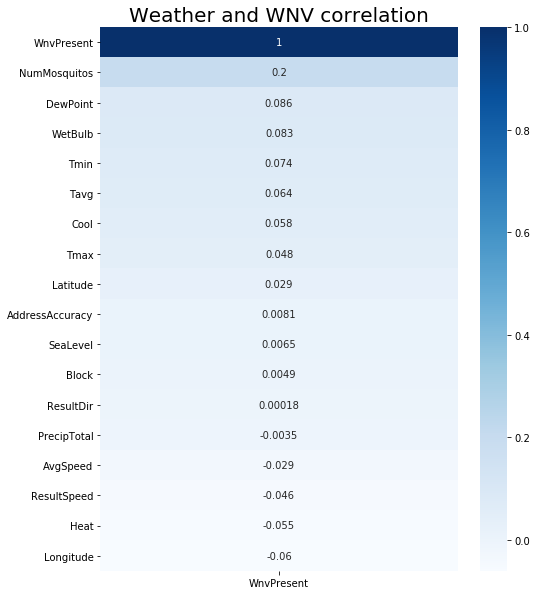

In [54]:
plt.figure(figsize=(8,10))
sns.heatmap(X.corr()[['WnvPresent']].sort_values(by='WnvPresent', ascending=False), annot=True, cmap='Blues');
plt.title('Weather and WNV correlation', fontsize=20)

In [37]:
#weather = weather.loc[weather['Station'] == 1]

In [38]:
#weather2 = weather[['Date', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'PrecipTotal', 'ResultSpeed', 'AvgSpeed']].fillna(method='bfill')

Text(0.5,1,'Train correlation')

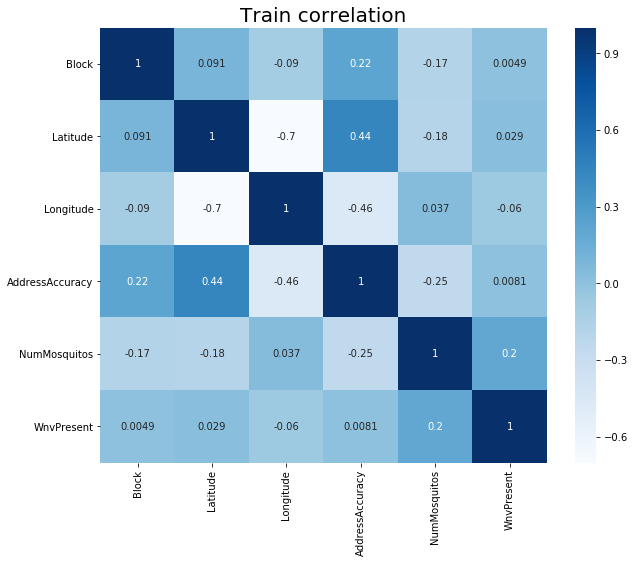

In [58]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True, cmap='Blues')
plt.title('Train correlation', fontsize=20)